## This project analyzes inventory data from multiple sources to understand sales performance, inventory turnover, and purchasing trends across stores and vendors.

#### Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### Loading the six datasets

In [69]:
catalog = pd.read_csv(r"C:\projects from unified mentor\Internship projects\Project 02\Inventory Data Analysis  _ (Finance Analyst)-20250623T132409Z-1-001\Inventory Data Analysis  _ (Finance Analyst)\2017PurchasePricesDec.csv")
sales = pd.read_csv(r"C:\projects from unified mentor\Internship projects\Project 02\Inventory Data Analysis  _ (Finance Analyst)-20250623T132409Z-1-001\Inventory Data Analysis  _ (Finance Analyst)\SalesFINAL12312016.csv")
beg_inv = pd.read_csv(r"C:\projects from unified mentor\Internship projects\Project 02\Inventory Data Analysis  _ (Finance Analyst)-20250623T132409Z-1-001\Inventory Data Analysis  _ (Finance Analyst)\BegInvFINAL12312016.csv")
end_inv = pd.read_csv(r"C:\projects from unified mentor\Internship projects\Project 02\Inventory Data Analysis  _ (Finance Analyst)-20250623T132409Z-1-001\Inventory Data Analysis  _ (Finance Analyst)\EndInvFINAL12312016.csv")
purchases = pd.read_csv(r"C:\projects from unified mentor\Internship projects\Project 02\Inventory Data Analysis  _ (Finance Analyst)-20250623T132409Z-1-001\Inventory Data Analysis  _ (Finance Analyst)\PurchasesFINAL12312016.csv")
invoices = pd.read_csv(r"C:\projects from unified mentor\Internship projects\Project 02\Inventory Data Analysis  _ (Finance Analyst)-20250623T132409Z-1-001\Inventory Data Analysis  _ (Finance Analyst)\InvoicePurchases12312016.csv")

#### Heads of all Dataframes

In [70]:
catalog.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [71]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNumber,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [72]:
beg_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [73]:
end_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [74]:
purchases.head(3)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1


In [75]:
invoices.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


#### Tails of all DFs

In [76]:
catalog.tail()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS
12260,46964,Calera Viognier Mt Harlan,35.99,750mL,750,2,24.32,10754,PERFECTA WINES


In [77]:
sales.tail()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNumber,VendorName
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2/12/2016,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2/13/2016,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2/19/2016,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2/22/2016,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE
1048574,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,2,25.90,12.95,2/24/2016,750,2,0.22,2000,SOUTHERN WINE & SPIRITS NE


In [78]:
beg_inv.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01
206528,79_BALLYMENA_90089,79,BALLYMENA,90089,Ch Lynch Bages 12 Pauillac,750mL,24,119.99,2016-01-01


In [79]:
end_inv.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2016-12-31
224488,81_PEMBROKE_90604,81,PEMBROKE,90604,Ch Lynch Bages Pauilac,750mL,2,119.99,2016-12-31


In [80]:
purchases.tail()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-27,2017-01-09,2017-02-06,9.39,12,112.68,2
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,6.75,12,81.00,2
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,9.39,12,112.68,2
2372473,55_DRY GULCH_22298,55,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2


In [81]:
invoices.tail()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
5538,9622,WEIN BAUER INC,2017-01-06,13626,2016-12-21,2017-02-10,90,1563.00,8.60,NaN
5539,9625,WESTERN SPIRITS BEVERAGE CO,2017-01-10,13661,2016-12-23,2017-02-18,4617,37300.48,186.50,NaN
5540,3664,WILLIAM GRANT & SONS INC,2017-01-02,13643,2016-12-22,2017-02-04,9848,202815.78,932.95,NaN
5541,9815,WINE GROUP INC,2017-01-03,13602,2016-12-20,2017-02-08,24747,149007.56,819.54,NaN
5542,90058,ZORVINO VINEYARDS,2017-01-05,13574,2016-12-18,2017-02-12,437,3608.11,16.60,NaN


#### Info of all datasets

In [82]:
catalog.info(), sales.info(), beg_inv.info(), end_inv.info(), purchases.info(), invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non

(None, None, None, None, None, None)

In [83]:
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

In [84]:
datasets = [catalog, sales, beg_inv, end_inv, purchases, invoices]
catalog, sales, beg_inv, end_inv, purchases, invoices = [clean_columns(df) for df in datasets]

#### Handle missing values

In [85]:
missing_rows = catalog[catalog.isnull().any(axis=1)]
print(missing_rows.index.tolist())

[7915]


In [86]:
# Since Dataset Catalog has one row with missing values, we will drop that row

catalog.dropna(axis=0, how='any', inplace = True)

In [87]:
# As city column values are missing, we can map it with beg_inv cities.

store_city_map = beg_inv.set_index('store')['city'].to_dict()
end_inv['city'] = end_inv.apply(
    lambda row: store_city_map.get(row['store'], 'Unknown'), axis=1
)

In [88]:
missing_row = purchases[purchases.isnull().any(axis=1)]
print(missing_row.index.tolist())

[1109668, 1112426, 1116302]


In [89]:
purchases.loc[[1109668, 1112426, 1116302]]

,inventoryid,store,brand,description,size,vendornumber,vendorname,ponumber,podate,receivingdate,invoicedate,paydate,purchaseprice,quantity,dollars,classification
1109668,34_PITMERDEN_3121,34,3121,Pinnacle Rainbow Sherbet,NaN,12546,JIM BEAM BRANDS COMPANY,10938,2016-06-27,2016-07-04,2016-07-13,2016-08-16,6.93,7,48.51,1
1112426,34_PITMERDEN_5678,34,5678,Skinnygirl Pina Colada,NaN,12546,JIM BEAM BRANDS COMPANY,10938,2016-06-27,2016-07-09,2016-07-13,2016-08-16,6.93,6,41.58,1
1116302,39_EASTHALLOW_15365,39,15365,Alabaster 07 Tinta de Toro,NaN,9552,M S WALKER INC,10972,2016-06-29,2016-07-07,2016-07-13,2016-08-21,91.83,1,91.83,2


In [90]:
# Define the list of inventory IDs you're looking for
target_inventory_ids = [3121,5678,15365]

# Filter the sales DataFrame
filtered_catalog = catalog[catalog['brand'].isin(target_inventory_ids)]

# Display the filtered rows
print(filtered_catalog)

      brand                 description   price   size volume  classification  \
572    3121    Pinnacle Rainbow Sherbet    9.99  750mL    750               1   
1305   5678      Skinnygirl Pina Colada   12.99  750mL    750               1   
6933  15365  Alabaster 07 Tinta de Toro  142.99  750mL    750               2   

      purchaseprice  vendornumber                   vendorname  
572            6.93         12546  JIM BEAM BRANDS COMPANY      
1305           6.93         12546  JIM BEAM BRANDS COMPANY      
6933          91.83          9552  M S WALKER INC               


In [91]:
# Create a mapping: inventoryid → size
size_map = catalog.drop_duplicates(subset='brand').set_index('brand')['size']

# Fill missing sizes using map
purchases['size'] = purchases['size'].fillna(purchases['brand'].map(size_map))

In [92]:
invoices['approval'].unique()

array([nan, 'Frank Delahunt'], dtype=object)

In [93]:
invoices.drop(columns='approval', inplace=True)

#### Convert dates

In [94]:
sales['salesdate'] = pd.to_datetime(sales['salesdate'])
purchases['podate'] = pd.to_datetime(purchases['podate'])
purchases['receivingdate'] = pd.to_datetime(purchases['receivingdate'])
purchases['invoicedate'] = pd.to_datetime(purchases['invoicedate'])
purchases['paydate'] = pd.to_datetime(purchases['paydate'])
invoices['podate'] = pd.to_datetime(invoices['podate'])
invoices['invoicedate'] = pd.to_datetime(invoices['invoicedate'])
invoices['paydate'] = pd.to_datetime(invoices['paydate'])


In [95]:
# Filter only wine (Classification = 2)
wine_sales = sales[sales['classification'] == 2].copy()
wine_purchases = purchases[purchases['classification'] == 2].copy()

In [96]:
print("Wine Sales Shape:", wine_sales.shape)
print("Wine Purchases Shape:", wine_purchases.shape)

Wine Sales Shape: (436784, 14)
Wine Purchases Shape: (1052240, 16)


### Monthly and Weekly Demand Trend (All Inventory Products)

In [97]:
sales['Month'] = sales['salesdate'].dt.to_period('M')

In [98]:
monthly_sales = sales.groupby('Month')['salesquantity'].sum().reset_index()

In [99]:
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

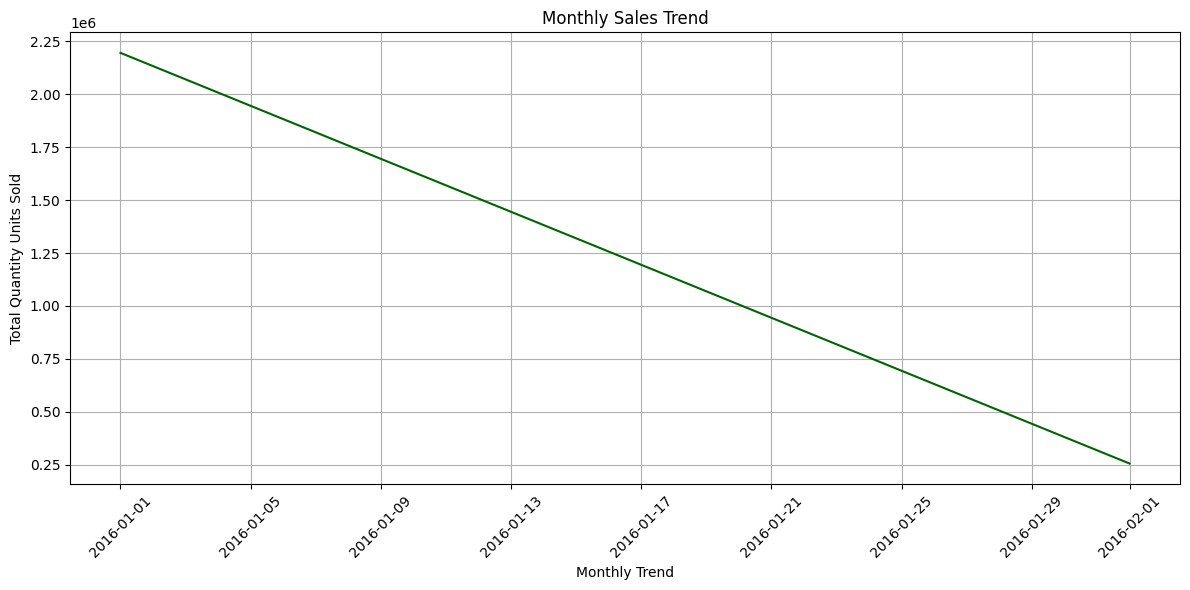

In [100]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales,x='Month',y='salesquantity', markers='o', color='darkgreen')
plt.title("Monthly Sales Trend")
plt.xlabel("Monthly Trend")
plt.ylabel("Total Quantity Units Sold")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### There was high volume in sales in the last week of January. February performed well overall month, however there was high fluctuation seen similar to Jan which end going down as the month finished

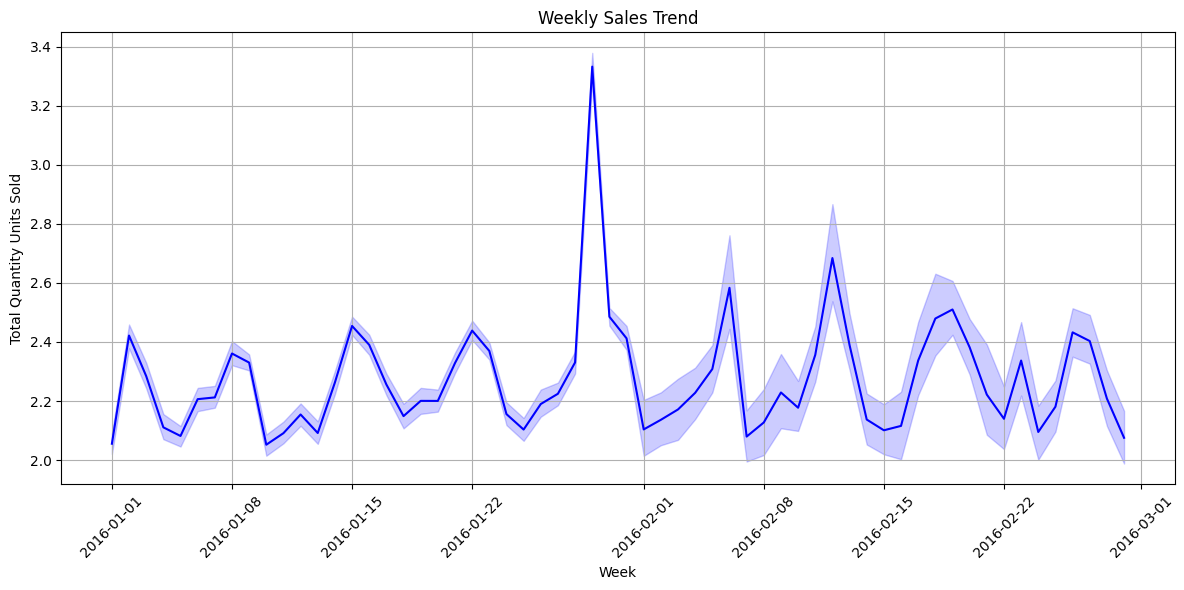

In [101]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sales,x='salesdate',y='salesquantity', markers='*', color='blue')
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Quantity Units Sold")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
sales.head()

,inventoryid,store,brand,description,size,salesquantity,salesdollars,salesprice,salesdate,volume,classification,excisetax,vendornumber,vendorname,Month
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016-01
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,2016-01
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016-01
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016-01
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016-01


### Weekly Sales Trend by Classification (considering 1 as Liquor and 2 as Wine)

In [103]:
weekly_class_sales = (
    sales.groupby(['salesdate','classification'])['salesquantity']
    .sum()
    .reset_index()
)

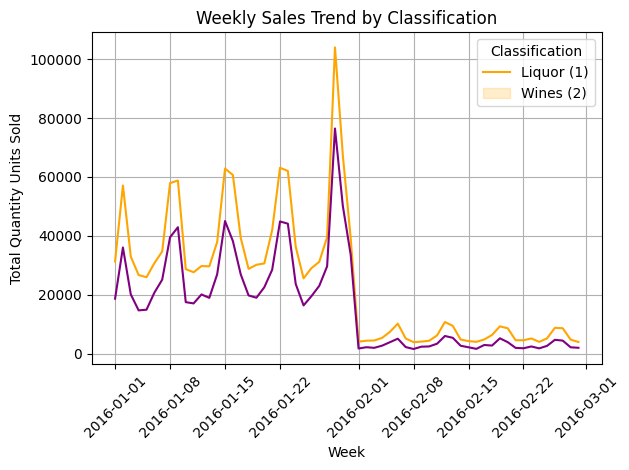

In [104]:
plt.Figure(figsize=(10,2))
sns.lineplot (data=weekly_class_sales,x='salesdate', y='salesquantity', hue='classification', palette={1:'orange',2:'purple'}, markers='o')
plt.title("Weekly Sales Trend by Classification")
plt.xlabel("Week")
plt.ylabel("Total Quantity Units Sold")
plt.legend(title='Classification',labels=['Liquor (1)', 'Wines (2)'])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Weekly sales analysis showed Liquor drives the bulk of store sales, particularly during January peaks. Inventory planning should prioritize liquor replenishment cycles and account for post-January drop-offs in both Liquor and Wine

#### What Your Chart Tells Us:
Liquor (Classification 1):
1. Has higher weekly sales than wine overall
2. Shows strong weekly spikes, especially leading up to the last week of January
3. Hits a massive peak in late Jan (~100,000 units!) — possibly related to New Year demand

Wines (Classification 2):
1. Also shows weekly spikes, but consistently lower than liquor
2. Peak is around 75,000 units in late Jan
3. Trend follows liquor — suggesting similar seasonal behavior, but less volume


In [105]:
print("Max sales quantity:", sales['salesquantity'].max())
print("Weekly grouped max:", weekly_class_sales['salesquantity'].max())

Max sales quantity: 432
Weekly grouped max: 103982


### ABC Analysis — Product Prioritization

In [106]:
# Create a new column for sales value

sales['salesvalue'] = sales['salesquantity'] * sales['salesprice']

In [107]:
# Group by product description to get total sales value

product_sales = (sales.groupby('description')['salesvalue'].sum().reset_index().sort_values(by='salesvalue',ascending=False))

In [108]:
# Calculate % contribution and cumulative %

product_sales['%contribution'] = product_sales['salesvalue']/product_sales['salesvalue'].sum()*100
product_sales['cumulative%'] = product_sales['%contribution'].cumsum()

In [109]:
# Categorize into A, B, C

def assign_abc(cum_pct):
    if cum_pct<=70:
        return 'A'
    elif cum_pct <=90:
        return 'B'
    else:
        return 'C'

In [110]:
product_sales['ABC_category'] = product_sales['cumulative%'].apply(assign_abc)

In [111]:
# Top 10 for review

product_sales.head(10)

,description,salesvalue,%contribution,cumulative%,ABC_category
1137,Capt Morgan Spiced Rum,610008.34,1.840736,1.840736,A
3348,Jack Daniels No 7 Black,558064.03,1.683991,3.524727,A
73,Absolut 80 Proof,422095.29,1.273697,4.798424,A
6378,Tito's Handmade Vodka,420186.25,1.267937,6.066360,A
3650,Ketel One Vodka,417950.59,1.261190,7.327551,A
3430,Jameson Irish Whiskey,410287.84,1.238068,8.565618,A
3021,Grey Goose Vodka,394280.19,1.189763,9.755382,A
420,Baileys Irish Cream,294738.43,0.889390,10.644772,A
3579,Kahlua,290933.11,0.877908,11.522680,A
3470,Jim Beam,255837.61,0.772005,12.294685,A


In [112]:
product_sales['ABC_category'].value_counts()

ABC_category
C    4931
B    1285
A     674
Name: count, dtype: int64

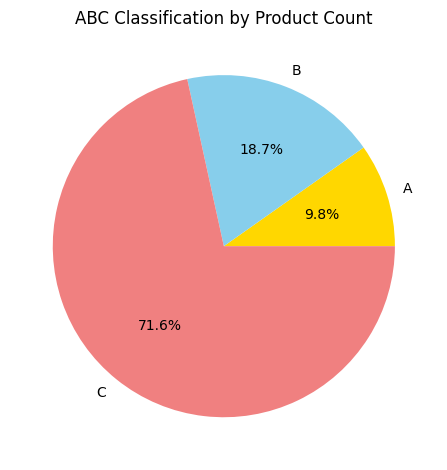

In [113]:
abc_counts = product_sales['ABC_category'].value_counts().sort_index()
abc_counts.plot(kind='pie', autopct='%1.1f%%', labels=['A', 'B', 'C'], colors=['gold', 'skyblue', 'lightcoral'])
plt.title('ABC Classification by Product Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### Compare ABC Category with Inventory On Hand
##### ABC Analysis combined with inventory levels shows a well-optimized stock distribution — A-class products, which contribute over 70% of revenue, are appropriately prioritized in inventory. C-class items are kept lean, reducing holding costs and minimizing excess.

In [114]:
# Merge ABC data with beginning inventory
abc_inventory = product_sales.merge(beg_inv, on='description', how='left')

# Average stock level per ABC category
abc_inventory.groupby('ABC_category')['onhand'].mean().round(2)

ABC_category
A    30.82
B    16.32
C    12.51
Name: onhand, dtype: float64

### Economic Order Quantity (EOQ) Analysis
Find the ideal order quantity for each product that minimizes:
1. Ordering Costs (cost per purchase order placed)
2. Carrying Costs (cost of holding inventory)

In [115]:
invoices.describe()

,vendornumber,invoicedate,ponumber,podate,paydate,quantity,dollars,freight
count,5543.00000,5543,5543.000000,5543,5543,5543.000000,5.543000e+03,5543.000000
mean,20662.75212,2016-07-10 18:59:25.578206720,10889.419087,2016-06-24 08:48:08.832762112,2016-08-15 06:14:05.607072,6058.880931,5.807338e+04,295.954301
min,2.00000,2016-01-04 00:00:00,8106.000000,2015-12-20 00:00:00,2016-02-04 00:00:00,1.000000,4.140000e+00,0.020000
25%,3089.00000,2016-04-11 00:00:00,9503.500000,2016-03-24 12:00:00,2016-05-16 00:00:00,83.000000,9.678100e+02,5.020000
50%,7240.00000,2016-07-11 00:00:00,10890.000000,2016-06-25 00:00:00,2016-08-15 00:00:00,423.000000,4.765450e+03,24.730000
75%,10754.00000,2016-10-09 00:00:00,12275.500000,2016-09-23 00:00:00,2016-11-14 00:00:00,5100.500000,4.458718e+04,229.660000
max,201359.00000,2017-01-10 00:00:00,13661.000000,2016-12-23 00:00:00,2017-02-19 00:00:00,141660.000000,1.660436e+06,8468.220000
std,34582.15841,NaN,1600.859969,NaN,NaN,14453.338164,1.402340e+05,713.585093


#### By adopting EOQ-based ordering, the company can place smarter, cost-efficient orders based on real demand and holding costs — avoiding frequent small purchases (wasting money) or large stockpiles (increasing storage cost)

In [116]:
# Use mean ordering (freight) cost and estimated carrying cost
ordering_cost = 295.95
carrying_rate = 0.10 #assumed

# Step 1: Annual demand per item
annual_demand = sales.groupby('description')['salesquantity'].sum().reset_index()
annual_demand.columns = ['description', 'Annualdemand']

# Step 2: Purchase price per item
price_data = purchases[['description', 'purchaseprice']].drop_duplicates()

# Step 3: Merge both
eoq_data = pd.merge(annual_demand, price_data, on='description', how='left').dropna()

# Step 4: Holding cost per unit
eoq_data['holdingcost'] = eoq_data['purchaseprice'] * carrying_rate

# Step 5: EOQ Formula
eoq_data['EOQ'] = np.sqrt((2 * eoq_data['Annualdemand'] * ordering_cost) / eoq_data['holdingcost'])

# View results
eoq_data[['description', 'Annualdemand', 'purchaseprice', 'holdingcost', 'EOQ']].sort_values(by='EOQ', ascending=False).head(10)

,description,Annualdemand,purchaseprice,holdingcost,EOQ
6567,Smirnoff 80 Proof,43423,0.77,0.077,18270.007251
2606,Dr McGillicuddy's Mentholmnt,24188,0.72,0.072,14101.259400
7783,Yukon Jack,24037,0.72,0.072,14057.175066
6604,Smirnoff Raspberry Vodka,22459,0.74,0.074,13403.046296
6554,Skyy Vodka,18586,0.72,0.072,12360.922633
1238,Canadian Club,19187,0.76,0.076,12224.213084
1333,Capt Morgan Spiced Rum,35866,1.47,0.147,12017.301983
5668,Pinnacle Vodka,15987,0.74,0.074,11308.156169
3957,Jim Beam,21239,1.07,0.107,10839.252009
471,Bacardi Superior Rum,17861,0.93,0.093,10661.923962


#### Observations:
##### Smirnoff 80 Proof has the highest EOQ
1. Because it has the highest demand (43K units/year)
2. This means: order it in large batches, less frequently.

##### Items with higher purchase price (e.g., Capt Morgan) tend to have slightly smaller EOQs, assuming same demand, because higher prices → higher holding costs → EOQ goes down (since storing them is costlier)

##### Top 3 Products take bulk of inventory value are Smirnoff, Dr McGillicuddy, Yukon Jack = likely the ‘A’ items in ABC Analysis

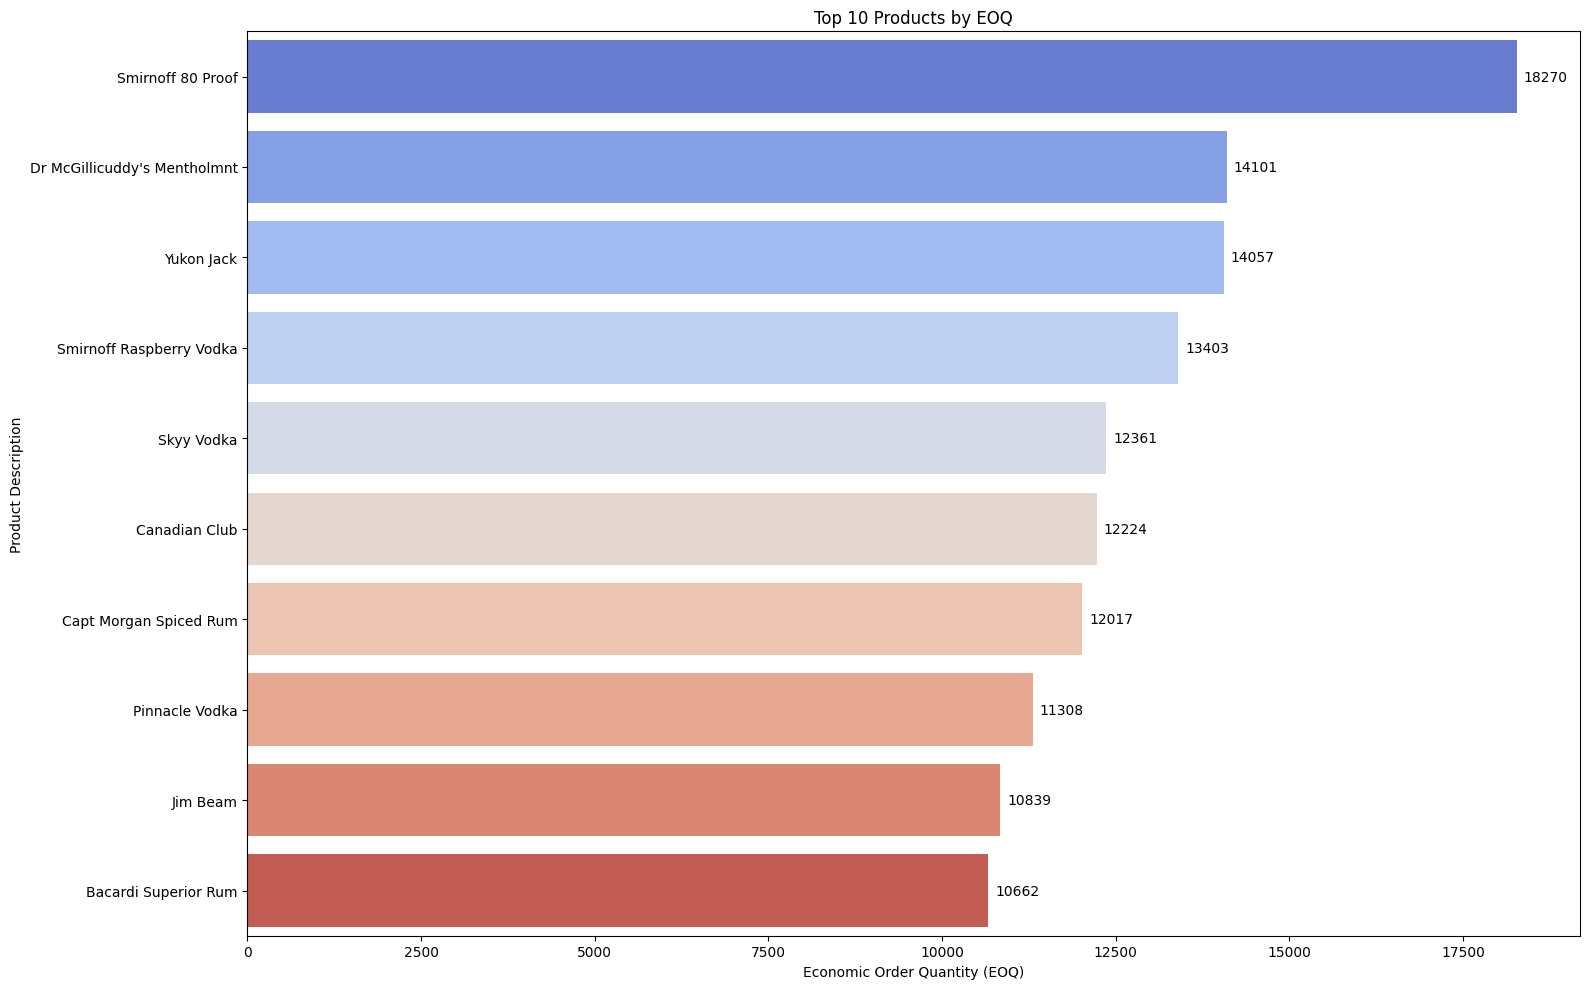

In [117]:
top10 = eoq_data.sort_values(by='EOQ', ascending=False).head(10)

plt.figure(figsize=(16,10))
sns.barplot(data=top10, x='EOQ', y='description', hue='description', palette='coolwarm', legend=False)
for index, value in enumerate(top10['EOQ']):
    plt.text(value + 100, index, f"{value:.0f}", va='center')
plt.title('Top 10 Products by EOQ')
plt.xlabel('Economic Order Quantity (EOQ)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

### Reorder Point (ROP)
This tell us When should we reorder a product so we don't run out before the next batch arrives?

****ROP values were calculated to ensure timely reordering before stockouts occur, based on historical lead times and daily sales velocity. Products with high lead times or rapid sales cycles require earlier reorders.

In [118]:
# Calculate lead time from purchases using InventoryId

purchases['LeadTime'] = (purchases['receivingdate'] - purchases['podate']).dt.days

# Filter out negative/NaT

purchases = purchases[purchases['LeadTime'].notnull() & (purchases['LeadTime'] >= 0)]

# Group average lead time by InventoryId

lead_time_avg = purchases.groupby('inventoryid')['LeadTime'].mean().reset_index()
lead_time_avg.rename(columns={'LeadTime': 'AvgLeadTime'}, inplace=True)

In [119]:
eoq_data = eoq_data.merge(purchases[['description', 'inventoryid']].drop_duplicates(),on='description', how='left')

In [120]:
eoq_data['DailyDemand'] = eoq_data['Annualdemand'] / 365

In [121]:
# Merge with avg lead time

eoq_data = eoq_data.merge(lead_time_avg, on='inventoryid', how='left')

In [122]:
eoq_data['ROP'] = eoq_data['DailyDemand']*eoq_data['AvgLeadTime']

In [123]:
# First: drop missing values and duplicates
rop_top10 = eoq_data[['inventoryid', 'ROP']].dropna().drop_duplicates()
rop_top10 = rop_top10.sort_values(by='ROP', ascending=False).head(10)

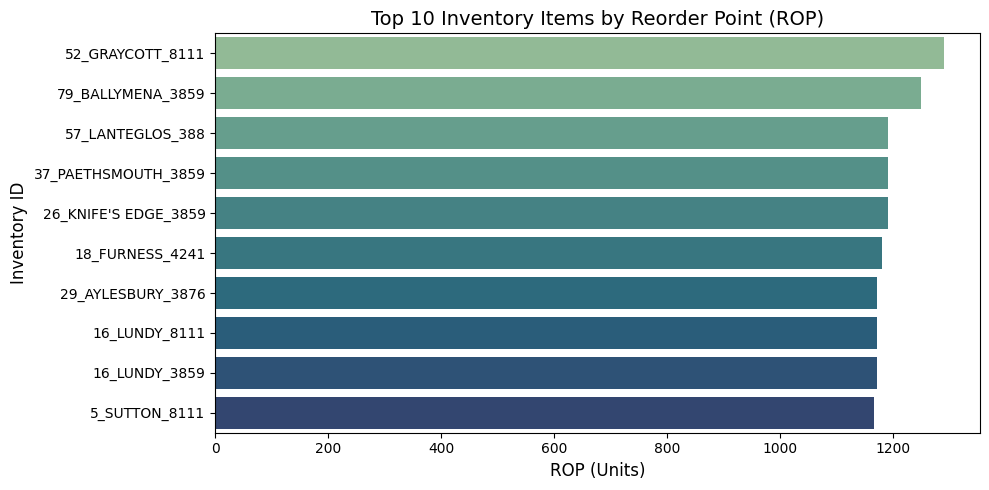

In [124]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=rop_top10,
    x='ROP',
    y='inventoryid',
    hue='inventoryid',
    palette='crest',
    legend=False
)

plt.title('Top 10 Inventory Items by Reorder Point (ROP)', fontsize=14)
plt.xlabel('ROP (Units)', fontsize=12)
plt.ylabel('Inventory ID', fontsize=12)
plt.tight_layout()
plt.show()


### Inventory Turnover & Carrying Cost Efficiency
How efficiently are we using inventory, and where are we bleeding carrying cost?

In [125]:
# 1. Estimate COGS (Cost of Goods Sold)

# Approximate COGS using: SalesQuantity × PurchasePrice

sales = sales.merge(purchases[['inventoryid', 'purchaseprice']], on='inventoryid', how='left')
sales['COGS'] = sales['salesquantity'] * sales['purchaseprice']

# Total annual COGS per item

cogs_df = sales.groupby('inventoryid')['COGS'].sum().reset_index()

In [126]:
# 2. Calculate Average Inventory

beg_inv = beg_inv[['inventoryid', 'onhand']].rename(columns={'onhand': 'BegInventory'})
end_inv = end_inv[['inventoryid', 'onhand']].rename(columns={'onhand': 'EndInventory'})

inv_avg = beg_inv.merge(end_inv, on='inventoryid', how='inner')
inv_avg['AvgInventory'] = (inv_avg['BegInventory'] + inv_avg['EndInventory']) / 2

In [127]:
# 3. Calculate Inventory Turnover

# Merge with COGS
inv_turnover = inv_avg.merge(cogs_df, on='inventoryid', how='left')
inv_turnover['InventoryTurnover'] = inv_turnover['COGS'] / inv_turnover['AvgInventory']
inv_turnover['DaysInInventory'] = 365 / inv_turnover['InventoryTurnover']

In [128]:
# 4. Estimate Carrying Cost (Assume 25%)

carrying_rate = 0.25
avg_cost = purchases['purchaseprice'].mean()
inv_turnover['CarryingCost'] = inv_turnover['AvgInventory'] * avg_cost * carrying_rate

In [129]:
top_slow = inv_turnover.sort_values(by='DaysInInventory', ascending=False).head(10)

# Filter only finite values
top_slow = top_slow[np.isfinite(top_slow['DaysInInventory']) & (top_slow['DaysInInventory'] > 0)]

top_slow[['inventoryid', 'DaysInInventory']]

,inventoryid,DaysInInventory


In [130]:
print("Total:", len(inv_turnover))
print("NaNs in Days:", inv_turnover['DaysInInventory'].isna().sum())
print("Infs in Days:", np.isinf(inv_turnover['DaysInInventory']).sum())
print("Zeros in AvgInventory:", (inv_turnover['AvgInventory'] == 0).sum())
print("NaNs in COGS:", inv_turnover['COGS'].isna().sum())

Total: 174976
NaNs in Days: 29208
Infs in Days: 3638
Zeros in AvgInventory: 864
NaNs in COGS: 29208


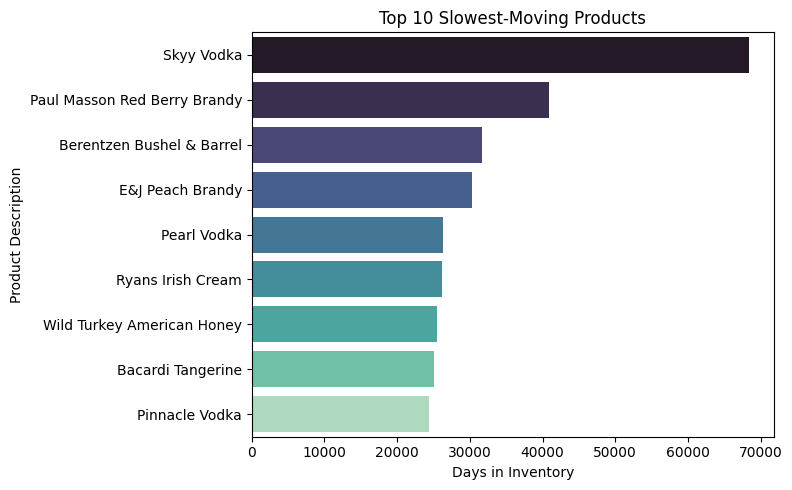

In [142]:
# Keep only rows with finite & positive DaysInInventory
plot_data = inv_turnover[
    np.isfinite(inv_turnover['DaysInInventory']) &
    (inv_turnover['DaysInInventory'] > 0)
]

# Sort and get top 10 slowest moving items
plot_data = plot_data.sort_values(by='DaysInInventory', ascending=False).head(10)

# Merge to get product name
plot_data = plot_data.merge(purchases[['inventoryid', 'description']].drop_duplicates(), on='inventoryid', how='left')

plt.figure(figsize=(8,5))
sns.barplot(data=plot_data, x='DaysInInventory', y='description',hue='description', palette='mako')
plt.title('Top 10 Slowest-Moving Products')
plt.xlabel('Days in Inventory')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

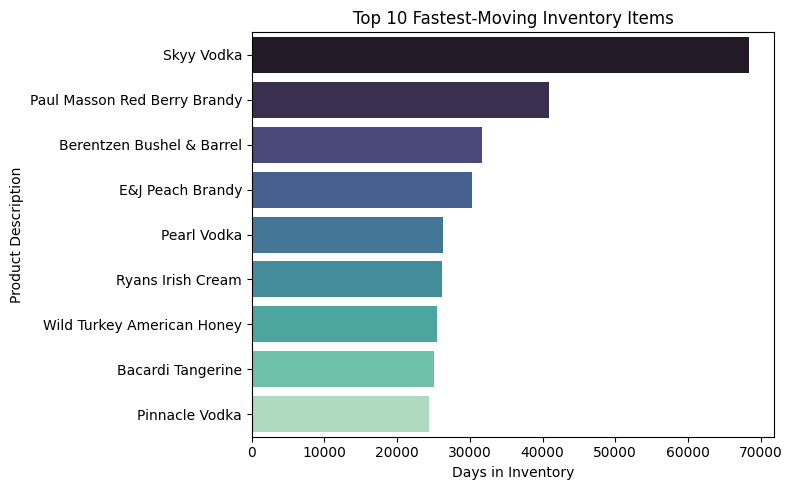

In [143]:
# Filter valid records again (optional if already done)
fast_items = inv_turnover[
    np.isfinite(inv_turnover['DaysInInventory']) &
    (inv_turnover['DaysInInventory'] > 0)
]

# Sort by lowest days in inventory
fast_items = fast_items.sort_values(by='DaysInInventory', ascending=False).head(10)

# Merge with descriptions
fast_items = fast_items.merge(purchases[['inventoryid', 'description']].drop_duplicates(), on='inventoryid', how='left')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=fast_items, x='DaysInInventory', y='description',hue='description', palette='mako')
plt.title('Top 10 Fastest-Moving Inventory Items')
plt.xlabel('Days in Inventory')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

In [ ]:
purchases['LeadTime'].head()

0    12
1    10
2    11
3    10
4     9
Name: LeadTime, dtype: int64

### Identify Bottlenecks & Recommend Process Improvements
Find inefficiencies in procurement, inventory handling, and sales flow that may be:
1. Causing stockouts, delays, or excess inventory
2. Driving up freight, holding, or ordering costs
3. Leading to poor turnover or high ROP

In [ ]:
# Summary
lead_summary = purchases.groupby('vendorname')['LeadTime'].agg(['count', 'mean', 'max', 'min']).reset_index()
lead_summary = lead_summary.sort_values(by='mean', ascending=False)

lead_summary.head(10)


,vendorname,count,mean,max,min
38,FLAVOR ESSENCE INC,1,13.000000,13,13
0,AAPER ALCOHOL & CHEMICAL CO,1,10.000000,10,10
56,LAUREATE IMPORTS CO,1,10.000000,10,10
48,"IRA GOLDMAN AND WILLIAMS, LLP",13,9.615385,11,7
10,BLACK COVE BEVERAGES,44,9.318182,13,5
117,VINEDREA WINES LLC,33,8.818182,12,5
123,WALPOLE MTN VIEW WINERY,74,8.527027,12,4
92,SILVER MOUNTAIN CIDERS,2,8.500000,9,8
97,STARK BREWING COMPANY,41,8.487805,12,3
115,ULTRA BEVERAGE COMPANY LLP,84034,8.410477,14,3


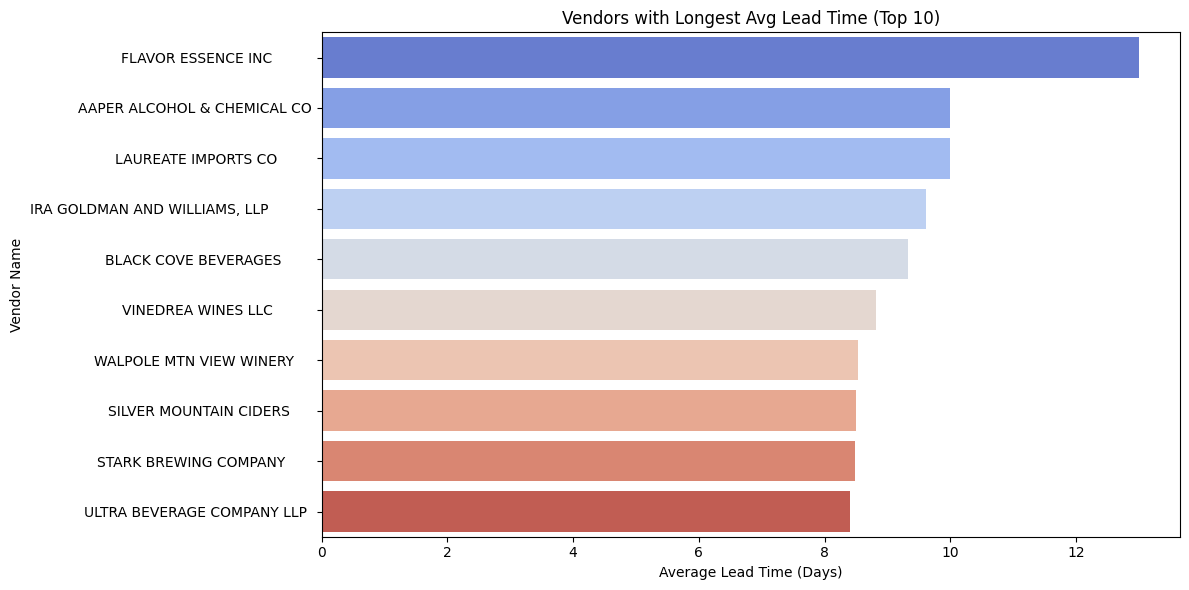

In [ ]:
# Group total freight cost by vendor
freight = invoices.groupby('vendorname')['freight'].sum().reset_index()
freight = freight.sort_values(by='freight', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=lead_summary.head(10), x='mean', y='vendorname',hue='vendorname', palette='coolwarm')
plt.title('Vendors with Longest Avg Lead Time (Top 10)')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Vendor Name')
plt.tight_layout()
plt.show()